In [3]:
import keras
import numpy as np
from sklearn.utils import shuffle

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images, train_labels = shuffle(train_images, train_labels, random_state=0)

train_images = train_images / 255.0
test_images = test_images / 255.0

data = np.array(train_images[0:1000])

image = np.zeros([1000, 784])

for i in range(0, 1000):
  image[i] = np.matrix.flatten(data[i])

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [0]:
image = np.zeros([1000, 784])

for i in range(0, 1000):
  image[i] = np.matrix.flatten(data[i])

In [5]:
weight = np.random.rand(784, 625)/6
weight.shape

(784, 625)

In [0]:
def distance(w, s = np.array([])):
        w = w.transpose()
        num_ = np.tile(s, (w.__len__(), 1))
        indexes = np.sum(np.power(w - num_, 2), axis=1)
        return np.argmin(indexes)

In [0]:
import time
tic = time.clock()

In [8]:
learning_rate = 0.6
all_index = []
count = 0

for epoch in range (0, 20):
  for i in range (0, 1000):
    index = distance(weight, image[i])
    if epoch == 19:
      all_index.append([index, train_labels[i]])
    for n in range (0, 784):
      weight[n,index] += learning_rate * (image[i, n] - weight[n,index])
  count += 1
  print('epoch is:', count)
  learning_rate = 0.9 * learning_rate

epoch is: 1
epoch is: 2
epoch is: 3
epoch is: 4
epoch is: 5
epoch is: 6
epoch is: 7
epoch is: 8
epoch is: 9
epoch is: 10
epoch is: 11
epoch is: 12
epoch is: 13
epoch is: 14
epoch is: 15
epoch is: 16
epoch is: 17
epoch is: 18
epoch is: 19
epoch is: 20


In [9]:
toc = time.clock()
toc - tic

145.600973

In [0]:
all_index.sort(reverse=True)
# all_index

In [11]:
sort = np.array(all_index)
sort.shape

(1000, 2)

In [12]:
table_ = np.zeros([625,10], dtype=int)
print(table_)

for i in range (0, sort.shape[0]-1):
      if sort[i][1] == 0:
        table_[sort[i][0]][0] += 1
      elif sort[i][1] == 1:
        table_[sort[i][0]][1] += 1
      elif sort[i][1] == 2:
        table_[sort[i][0]][2] += 1
      elif sort[i][1] == 3:
        table_[sort[i][0]][3] += 1
      elif sort[i][1] == 4:
        table_[sort[i][0]][4] += 1
      elif sort[i][1] == 5:
       table_[sort[i][0]][5] += 1
      elif sort[i][1] == 6:
        table_[sort[i][0]][6] += 1
      elif sort[i][1] == 7:
        table_[sort[i][0]][7] += 1
      elif sort[i][1] == 8:
        table_[sort[i][0]][8] += 1
      elif sort[i][1] == 9:
        table_[sort[i][0]][9] += 1
# table_

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [0]:
sum_ = np.sum(table_, axis=1, dtype=int)
sum_ = sum_.reshape(625,1)
table_sum = np.append(table_, sum_, axis=1)

In [0]:
index = np.arange(0, 625)
index = index.reshape(625,1)
table_index = np.append(index, table_sum, axis=1)

In [0]:
Table = table_index[table_index[:, -1].argsort()]
t = Table[605:625][:]

In [16]:
import pandas as pd

class_ = ['cluster','label=0','label=1','label=2','label=3','label=4','label=5','label=6','label=7','label=8','label=9','sum']
table_last = pd.DataFrame(t,columns=class_)
table_last = table_last.sort_values(by=['sum'], ascending=False)

table_last

,cluster,label=0,label=1,label=2,label=3,label=4,label=5,label=6,label=7,label=8,label=9,sum
19,561,0,32,0,0,0,0,0,2,1,0,35
18,408,0,23,1,0,1,0,0,1,0,0,26
17,251,0,23,0,1,0,0,0,1,0,0,25
16,606,2,0,1,0,0,0,0,0,21,0,24
15,298,0,0,0,21,0,1,0,0,1,0,23
14,238,0,19,1,0,1,0,0,1,0,0,22
13,98,0,19,0,0,0,0,0,0,1,0,20
12,171,19,0,0,0,0,0,0,0,0,0,19
11,170,0,0,0,0,0,0,0,0,18,0,18
10,306,0,0,0,0,16,0,0,1,0,1,18


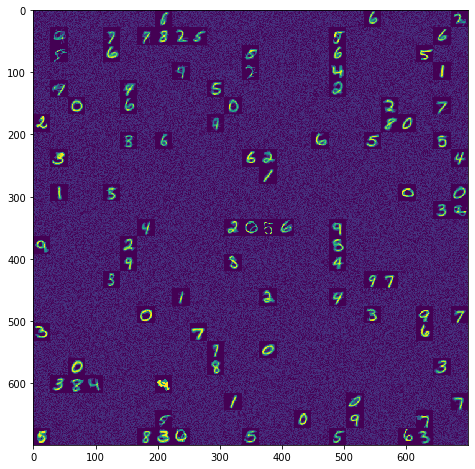

In [17]:
import matplotlib.pyplot as plt

w = weight.T.reshape(625,28,28)
ww = w.reshape(25,25,28,28)
www = ww.transpose((0,2,1,3)).reshape((700,700))

plt.figure(figsize=(12,8))
plt.imshow(www)